# A simplified model for sedimen transport by tidal currents

In a finite volume numerical model the fluxes or transports through the cell boundaries are key. Consider first a one dimensional transport equation:

$\partial c/\partial t + \partial q/\partial x$

where c is a concentration and q is a flux. The flux is $q=c u$ or concentration times velocity. In for sediment transport where the particles are not so fine that they are mixed through the whole watercolumn by the turbulence, then the sediment concentration is sometimes taken as proportional to the bed stress, i.e. $c ~\tau$, where the bed stress if often taken proportional to the velocity squared. This would result in:

$q = \alpha u^3$

where $\alpha$ is a constant. There are many variants, but the main concepts below will hold to some extent for other variants too.

When the flow is dominated by tides, then the flow and thus transport will be in one direction roughly half of the time and in the other direction the other half of the time and most of the transport will cancel out after a full tidal cycle. Over a longer time period it is therefore more interesting what will happen averaged over a tidal cycle. Luckily the transport equation is linear and we can just use the transport over a tidal cycle instead of numerically resolving the tide and averaging afterwards. It is sufficient to consider the tidal average of the transport:

$1/T \int_0^T q(t) dt = 1/T \int_0^T \alpha u^3 dt$


## Transport by M2 only

First consider the simplest case with only one dominant tidal current M2.

$u_{M2}(t) = A_{M2} cos(\omega_{M2} t + \phi_{M2})$

Here the nodal cycle is ignored and the two phase arguments u and g at initial time are added to $\phi$ and the initial time is assumed to be zero. Let's compute the average transport:

$1/T \int_0^T q(t) dt = 1/T \int_0^T \alpha ( A_{M2} cos(\omega_{M2} t + \phi_{M2}) )^3 dt$

where we select $T$ to be one M2 tidal cycle $T=2\pi/\omega_{M2}$.

$\overline{q} = 1/T  \left[ \int_0^{T/2} \alpha ( A_{M2} cos(\omega t + \phi) )^3 dt + 
 \int_{T/2}^T \alpha ( A_{M2} cos(\omega t + \phi) )^3 dt \right] = 0 $

The second integral exactly cancels the first one.

In [24]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
degrees_to_radians=2*pi/180.0

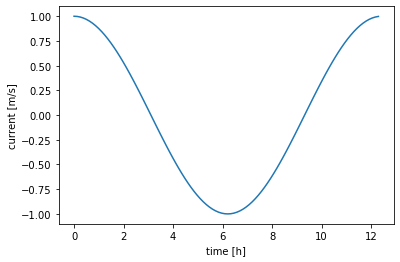

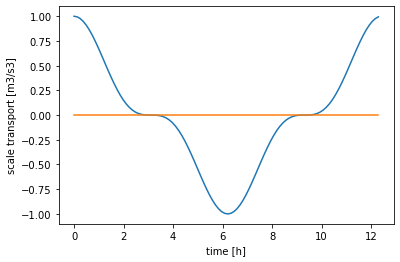

In [23]:
# mean transport for M2 only

T=12+25.2/60.0 #M2 period in hours
omega_M2= 2*pi/T
A_M2=1.0
phi_M2=0.0
n=2 # power for concentration, n+1 for q

t=np.arange(0.0,T,T/100)
nt=len(t)
u=A_M2*np.cos(omega_M2*t+phi_M2)
q=np.abs(u)**n * u
q_mean=np.mean(q)*np.ones(nt)

plt.plot(t,u)
plt.xlabel("time [h]")
plt.ylabel("current [m/s]")
plt.show()

plt.plot(t,q)
plt.plot(t,q_mean)
plt.xlabel("time [h]")
plt.ylabel("scale transport [m3/s3]")
plt.show()



## Transport by M2 and M4

Next consider the case with a dominant tidal constituent M2 and a minor constituent M4.

$u(t) = A_{M2} cos(\omega_{M2} t + \phi_{M2}) + A_{M4} cos(\omega_{M4} t + \phi_{M4})$

which can be rewritten as:

$u(t) = A_{M2} \left( cos(\omega_{M2} t + \phi_{M2}) + r cos(2 \omega_{M2} t + \phi_{M4}) \right)$

or shorter as:

$u(t) = A \left( cos(\omega t + \phi_{M2}) + r cos(2 \omega t + \phi_{M4}) \right)$


Now compute the average transport:

$\overline{q} = 1/T \int_0^T \alpha u^3 dt$

$ = 1/T \int_0^T \alpha {\left[ A \left( cos(\omega t + \phi_{M2}) + r cos(2 \omega t + \phi_{M4}) \right) \right]}^3 dt$

$ = \alpha A^3/T \int_0^T {\left[ \left( cos(\omega t + \phi_{M2}) + r cos(2 \omega t + \phi_{M4}) \right) \right]}^3 dt$

with $s=\omega t  + \phi_{M2}$

$ = (\alpha \omega A^3)/T \int_0^{2\pi} {\left[ \left( cos(s) + r cos(2 s + \phi_{M4} - 2 \phi_{M2}) \right) \right]}^3  ds$


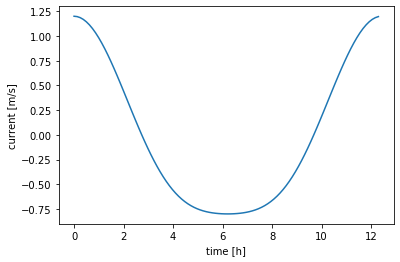

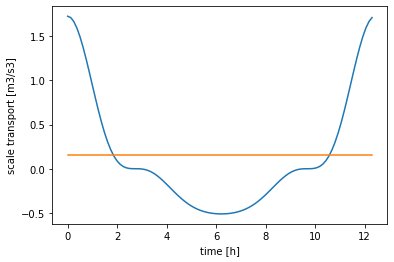

In [35]:
# mean transport for M2 and M4

T=12+25.2/60.0 #M2 period in hours
omega_M2= 2*pi/T
A_M2=1.0
phi_M2=0.0
omega_M4= 2*omega_M2
A_M4=0.2
phi_M4=0.0*degrees_to_radians
# plese try:
#   0.0 - peaks stronger than troughs --> positiive transport
#  45.0 - sawtooth with long decline --> no netto transport
#  90.0 - stronger troughs tan peaks --> negative transport
# 135.0 - sawtooth with long rise --> no netto transport
# 180.0 - same as 0.0

n=2 # power for concentration, n+1 for q

t=np.arange(0.0,T,T/100)
nt=len(t)
u=A_M2*np.cos(omega_M2*t+phi_M2)+A_M4*np.cos(omega_M4*t+phi_M4)
q=np.abs(u)**n * u
q_mean=np.mean(q)*np.ones(nt)

plt.plot(t,u)
plt.xlabel("time [h]")
plt.ylabel("current [m/s]")
plt.show()

plt.plot(t,q)
plt.plot(t,q_mean)
plt.xlabel("time [h]")
plt.ylabel("scale transport [m3/s3]")
plt.show()